In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
import scipy,scipy.stats
import statsmodels.formula.api as sm
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split

In [2]:
#1)	Load the training and testing sets using the read_csv() function, and save them as dataframes with the names pisaTrain and pisaTest. 


pisatrain=pd.read_csv('pisa2009train.csv')

pisatest=pd.read_csv('pisa2009test.csv')


In [3]:
print('pisatrain data shape:',pisatrain.shape)
print('pisatest data shape:',pisatest.shape)

pisatrain data shape: (3663, 24)
pisatest data shape: (1570, 24)


In [4]:
pisatrain.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [5]:
pisatrain.male.value_counts()

1    1872
0    1791
Name: male, dtype: int64

In [6]:
##  1#  How many students are there in the training set?
no_stud=pisatrain.male.count()
print('No of students in the training_set are:',no_stud)

No of students in the training_set are: 3663


In [7]:
##2)	Using groupby on pisaTrain, what is the average reading test score of males?
#Of Females?
avg_tst_scr=pisatrain['readingScore'].groupby(pisatrain['male']).mean()

###### here 1 is male and 0 is female
avg_tst_scr.index=['Female','Male']
avg_tst_scr

Female    512.940631
Male      483.532479
Name: readingScore, dtype: float64

In [8]:
### 3 3)	Which variables have missing data in at least one observation in the training set? 
pisatrain.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [9]:
###4 4)	Linear regression discards observations with missing data,so we will remove all such observations
###from the training and testing sets. Ideally we should be filling the missing values with plausible information
##, but for now, lets remove them and move ahead. 

pisaTrain = pisatrain.dropna(axis=0) #axis=0 because we want to delete the rows having NA 
pisaTest = pisatest.dropna(axis=0) 



In [10]:
##  How many observations are now in the training set?
### How many observations are now in the testing set?
print('pisatrain observation in train_set:',pisaTrain.shape[0])
print('pisatest observation in test_set:',pisaTest.shape[0])

pisatrain observation in train_set: 2414
pisatest observation in test_set: 990


In [11]:
####  5)	Which of the following variables is an unordered factor/categorical variable with at least 3 levels? 


catego_variable=pisaTrain.select_dtypes(include=['object']).columns
print('The categorical variable in pisatrain_set is:',catego_variable)


The categorical variable in pisatrain_set is: Index(['raceeth'], dtype='object')


In [12]:
##### 6 Now, consider the variable "raceeth" in our problem, which has levels "American Indian/Alaska Native",
####"Asian", "Black", "Hispanic", "More than one race", "Native Hawaiian/Other Pacific Islander", and "White". 
dummies=pd.get_dummies(pisaTrain['raceeth'])
dummies.head()



###6)	American Indian/Alaska Native, Asian, Black, Hispanic, More than one race, Native Hawaiian/Other Pacific Islander, White


,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White
1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1
9,0,0,0,0,1,0,0


In [67]:
###7)	Consider again adding our unordered Category race to the regression model with reference level "White". 
#### For a student who is Asian, which binary variables would be set to 0? All remaining variables will be set to 1. 
dummies=pd.get_dummies(pisaTrain({'raceeth':'American Indian/Alaska Native','Black','Hispanic','More than one race','Native Hawaiian/Other Pacific Islander'})
##7)	Indian/Alaska Native, Black, Hispanic, More than one race, Native Hawaiian/Other Pacific Islander

SyntaxError: invalid syntax (<ipython-input-67-cde03fc44242>, line 3)

In [61]:
###8)	For a student who is white, which binary variables would be set to 0? All remaining variables will be set to 1.American Indian/Alaska Native

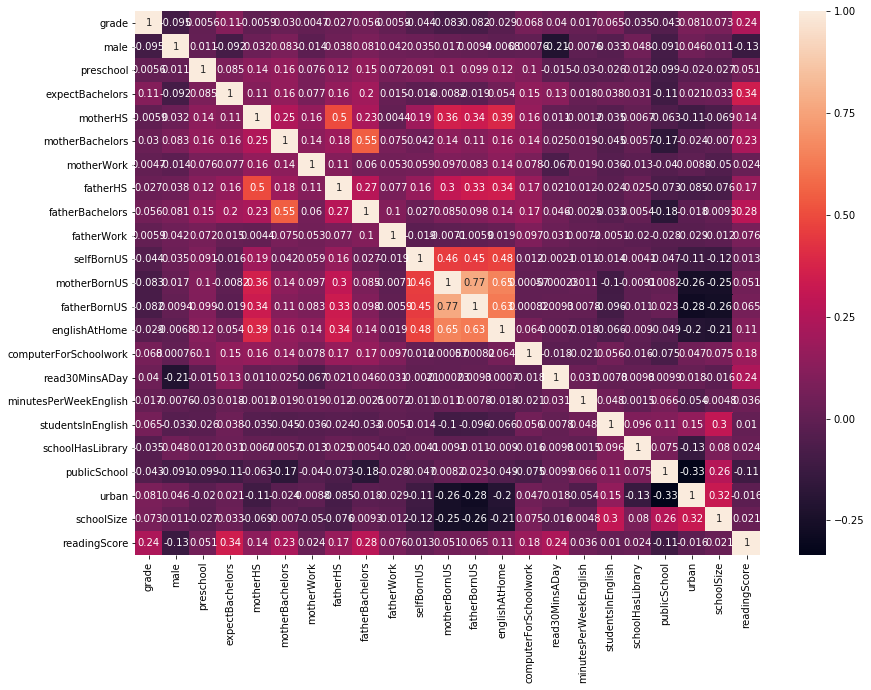

In [156]:
plt.figure(figsize=[14,10])
sns.heatmap(pisaTrain.corr(),annot=True)
plt.show()

In [13]:
df=pd.get_dummies(pisaTrain,drop_first=True)
df.head()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,readingScore,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
1,11,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,0,1173.0,575.01,0,0,0,0,0,1
3,10,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1,2640.0,458.11,0,1,0,0,0,0
4,10,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,1095.0,613.89,0,0,1,0,0,0
7,10,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0,1913.0,439.36,0,0,0,0,0,1
9,10,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1,0,899.0,465.90,0,0,0,1,0,0


In [117]:
###9)	Because the race variable takes on text values, we will have to create Dummy Variables before we run Modeling on the data.

x=df.drop(['readingScore','motherBornUS','fatherBornUS','motherHS','raceeth_Black','studentsInEnglish','urban','schoolHasLibrary','minutesPerWeekEnglish','fatherWork','preschool','publicSchool','schoolSize','englishAtHome','selfBornUS','motherWork'],axis=1)
y=df['readingScore']


In [118]:
lmscore=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lmscore.fit(x_train,y_train)
#predict the train data
pred_train=lmscore.predict(x_train)
print(pred_train)#predict has inbuild thershold
##pd.crosstab(y_train,pred_train)

[492.30879924 512.14012147 474.716578   ... 410.04948675 544.65944582
 576.26129855]


In [119]:
### What is the Multiple R-squared value of lmScore on the training set?
SSE=sum((y_train-pred_train)**2)
print(SSE)
TSS=sum((y_train-np.mean(y_train))**2)
print(TSS)

8897732.364321554
13350390.436966255


In [120]:
R2train=1-(SSE/TSS)
print('The R-squared value of lmscore is:',R2train)

The R-squared value of lmscore is: 0.33352268562240817


In [121]:
###10)	What is the training-set root-mean squared error (RMSE) of lmScore?

n=df.shape[0]
n


2414

In [122]:
RMSE=np.sqrt(SSE/n)
print(RMSE)

60.71151023375997


  12)	What is the meaning of the coefficient associated with variable raceethAsian?

Predicted difference in the reading score between an Asian student and a American Indian/Alaska Native student who is otherwise identica

In [123]:
### 1313)	Based on the significance codes, which variables out of these are candidates for removal from the model? 
##Select all that apply. (The factor variable raceeth should only be removed if none of its levels are significant.)
x2=add_constant(x_train)
logit=sm.OLS(y_train,x2)
logit=logit.fit()
print(logit.summary())





                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     64.48
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          2.69e-137
Time:                        12:20:24   Log-Likelihood:                -9633.5
No. Observations:                1689   AIC:                         1.929e+04
Df Residuals:                    1675   BIC:                         1.937e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [129]:
##14)	Using the "predict" function , use the lmScore model to predict the reading scores of students in pisaTest. 
##Call this list of predictions "predTest". Do not change the variables in the model
##(for example, do not remove variables that we found were not significant in the previous part of this problem). 
df1=pd.get_dummies(pisaTest)
df1.head()


,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,urban,schoolSize,readingScore,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10,0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,808.0,355.24,0,0,0,0,0,0,1
4,10,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0,808.0,453.50,0,0,0,0,0,0,1
6,10,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,808.0,405.13,1,0,0,0,0,0,0
7,10,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,808.0,665.05,0,0,0,0,0,0,1
8,11,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,808.0,604.84,0,0,0,0,0,0,1


In [207]:
X=df1.drop(['readingScore','minutesPerWeekEnglish','studentsInEnglish','urban','fatherWork','raceeth_American Indian/Alaska Native','raceeth_More than one race','raceeth_Native Hawaiian/Other Pacific Islander','motherBornUS','motherWork','fatherBornUS','computerForSchoolwork','motherHS','publicSchool','male','selfBornUS','motherBachelors','schoolSize','raceeth_Hispanic','raceeth_Asian','englishAtHome'],axis=1)
Y=df1['readingScore']

In [208]:
lmscore=LinearRegression()
x_train1,x_test1,y_train1,y_test1=train_test_split(X,Y,test_size=0.3,random_state=1)
lmscore.fit(x_train1,y_train1)
#predict the train data
pred_test=lmscore.predict(x_train1)#predict has inbuild thershold
##pd.crosstab(y_train,pred_train)

In [209]:
x3=add_constant(x_train1)
logit1=sm.OLS(y_train1,x3)
result=logit1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     29.27
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           3.11e-43
Time:                        16:25:23   Log-Likelihood:                -3969.4
No. Observations:                 693   AIC:                             7959.
Df Residuals:                     683   BIC:                             8004.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              218.9053     57.806  

In [210]:
### 14 What is the range between the maximum and minimum predicted reading score on the test set?
min_test=pred_test.min()

In [211]:
max_test=pred_test.max()

In [212]:
MM=max_test-min_test
print('The range betwwen maximum and minimum is:',MM)

The range betwwen maximum and minimum is: 254.9646666641304


In [214]:
###15)	What is the sum of squared errors (SSE) of lmScore on the testing set? 
##_____ (give a integer) 

##What is the root-mean squared error (RMSE) of lmScore on the testing set? 
##_____ (give in 2 decimals)

SSE1=sum((y_train1-pred_test)**2)
print(SSE)
TSS1=sum((y_train1-np.mean(y_train1))**2)
print(TSS)


8897732.364321554
13350390.436966255


In [148]:
###16)	What is the predicted test score used in the baseline model?
##Remember to compute this value using the training set and not the test set.
####pred_test=lmscore.predict(x_train)

In [215]:
###18)	What is the test-set R-squared value of lmScore?
R2train=1-(SSE1/TSS1)
print('The R-squared value of lmscore is:',R2train)

The R-squared value of lmscore is: 0.27837246274085525
